# Evaluación de Modelos


En este notebook veremos cómo implementar los pasos necesarios para una correcta evaluación de modelos. Las secciones del notebook son:
1. Comenzaremos con nuestro infaltable ejemplo con el dataset de Iris, implementando un `train_test_split` y, luego, optimización de hiperparámetros. A esta altura, ya debés estar cansado/a de este dataset. Pero si entiendes bien este ejemplo, el resto será más fácil.
2. En esta sección, debes aplicar lo aprendido en el dataset de Titanic.

## 1. Train-Test Split y Optimización de Hiperparámetros

### 1.1 Train-Test Split

1. Carga del dataset y separa en `X` e `y` como venimos haciendo.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#X = data[['petal length (cm)', 'petal width (cm)']]
X = data.drop("target", axis=1)
y = data.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Luego, como aprendimos, vamos a separar el dataset en conjuntos de entrenamiento `X_train, y_train` y de testeo `X_test,y_test` usando la función `train_test_split` de Scikit-Learn (¡recuerda mirar su documentación e importarla!). Esto lo hacemos para separar parte de los datos `X_test,y_test` con los cuales **no vamos a entrenar el modelo, sino que vamos a usarlos únicamente para evaluar su desempeño**.

2. Separa `X` e `y`, tomando en las variables `X_train, y_train` un 70% para entrenamiento y en las variables `X_test,y_test` un 30% para evaluación. Recuerda fijar el `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split
#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=55) #genero dupla entrenamiento y testeo(verdad)
#tamaño de prueba en porcentaje de cómo divido los datos. 30% son prueba y 70% entrenamiento
#stratify, aveces tengo desbalanceado de los datos y para eso uso esto para hacer la division balanceandolos.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


3. Crea un modelo de vecino más cercanos y entrénalo sobre el conjunto de Train.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

In [ ]:
#Entreno el modelo en la variable de entrenamiento Train
clf_knn.fit(X_train,y_train) #genera las predicciones, esto es lo que más tarda en sets de datos más grandes. para AD es lento,el knn es superrapido.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

4. Predice las etiquetas sobre el conjunto de Train y sobre el conjunto de Test.

In [ ]:
y_train_pred =clf_knn.predict(X_train)
y_test_pred =clf_knn.predict(X_test)
#esta parte para knn demora más, por las predicciones entre los modelos

5. Evalúa el desempeño del modelo usando la función `accuracy_score` y la matriz de confusión sobre ambos conjuntos (Train y Test).

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print('El accuracy(modelo vs variable entrenada) es: ',accuracy_score(y_train,y_train_pred)) 
#veo si los datos no se estan sobreentrenando. veo mi benchmark. para saber si mi modelo se llega a sobreentrenar si veo entre otros modelos

print('El accuracy(modelo vs variable verdad) es: ',accuracy_score(y_test,y_test_pred))
#veo que tanta capacidad de generalizacion tiene me midelo. veo extrapolando con otros elementos, con el modelo prediciendo datos de prueba
#mi modelo no conoce esos datos, y veo cómo se comporta


#ojo no esta bien que el pred test sea mayor que el entrenado. es raro (ver preg de lautaro, es el traintestsplit)

El accuracy(modelo vs variable entrenada) es:  0.9238095238095239
El accuracy(modelo vs variable verdad) es:  0.9333333333333333


In [ ]:
#Matriz de confusion
print('El accuracy(modelo vs variable entrenada) es: \n',confusion_matrix(y_train,y_train_pred)) 
print('El accuracy(modelo vs variable verdad) es: \n',confusion_matrix(y_test,y_test_pred))


El accuracy(modelo vs variable entrenada) es: 
 [[ 0 31  0]
 [ 0 37  0]
 [ 0 37  0]]
El accuracy(modelo vs variable verdad) es: 
 [[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]


**Para Pensar**:

1. ¿Qué ocurre con el desempeño con número de vecinos igual a 1 y un número de vecinos grande (del orden del tamaño del dataset?


In [ ]:
#es raro porque me dio lo mismo

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
from sklearn.model_selection import train_test_split

#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42) #genero dupla entrenamiento y testeo(verdad)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X = data.drop("target", axis=1)
y = data.target

#Si Knn=1
from sklearn.neighbors import KNeighborsClassifier
clf_kn1 = KNeighborsClassifier(n_neighbors=1)
#Entreno el modelo en la variable de entrenamiento Train
clf_kn1.fit(X_train,y_train)

y_train_pred =clf_knn.predict(X_train)
y_test_pred =clf_knn.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print('El accuracy(modelo vs variable entrenada) es: ',accuracy_score(y_train,y_train_pred)) 
print('El accuracy(modelo vs variable verdad) es: ',accuracy_score(y_test,y_test_pred))
#Matriz de confusion
print('El accuracy(modelo vs variable entrenada) es: \n',confusion_matrix(y_train,y_train_pred)) 
print('El accuracy(modelo vs variable verdad) es: \n',confusion_matrix(y_test,y_test_pred))

print()
#Si Knn=y_train.shape =105 
from sklearn.neighbors import KNeighborsClassifier
clf_knShapeDataset = KNeighborsClassifier(n_neighbors=105)
clf_knShapeDataset.fit(X_train,y_train)


y_train_pred =clf_knn.predict(X_train)
y_test_pred =clf_knn.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print('El accuracy(modelo vs variable entrenada) es: ',accuracy_score(y_train,y_train_pred)) 
print('El accuracy(modelo vs variable verdad) es: ',accuracy_score(y_test,y_test_pred))
#Matriz de confusion
print('El accuracy(modelo vs variable entrenada) es: \n',confusion_matrix(y_train,y_train_pred)) 
print('El accuracy(modelo vs variable verdad) es: \n',confusion_matrix(y_test,y_test_pred))


(105, 4) (105,) (45, 4) (45,)
El accuracy(modelo vs variable entrenada) es:  0.9523809523809523
El accuracy(modelo vs variable verdad) es:  1.0
El accuracy(modelo vs variable entrenada) es: 
 [[31  0  0]
 [ 0 33  4]
 [ 0  1 36]]
El accuracy(modelo vs variable verdad) es: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

El accuracy(modelo vs variable entrenada) es:  0.9523809523809523
El accuracy(modelo vs variable verdad) es:  1.0
El accuracy(modelo vs variable entrenada) es: 
 [[31  0  0]
 [ 0 33  4]
 [ 0  1 36]]
El accuracy(modelo vs variable verdad) es: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


2. ¿Cuál será el número óptimo de vecinos para este modelo?¿Cómo podrías obtenerlo?

# Haciendo una recursion y buscando el mejor accuracy para x cantidad de vecinos. y ver si en la matriz de confusion los valores predichos son iguales a la verdad (la diagonal poblada).


### 1.2 Encontrando el mejor hiperparámetro

Durante el entrenamiento, el modelo ajusta ciertas característica intrínsecas que llamamos parámetros. Por ejemplo, un árbol de decisión debe decidir automáticamente con qué umbrales comparar ciertos atributos en cada nodo. Pero los hiperparámetros son características que debemos definir nosotros; por ejemplo, la profundidad del árbol o el número de vecinos. Optimización de hiperparámetros se lleva un tiempo considerable en un flujo de ML, y si bien hay técnicas más o menos automáticas para hacerlo, al final siempre tiene algo artesanal. 
**Además, está fuertemente ligado a la evaluación de nuestro modelo: siempre optimizamos hiperparámetros dada cierta métrica. Esta métrica se define en función del problema, nuestras necesidades y posibilidades.**
 
La variación de hiperparámetros está asociada a la complejidad del modelo, al overfitting y al underfitting. Por ejemplo, en el caso de árboles de decisión, un árbol de profundidad 1 es mucho más sencillo que uno de profundidad 10. En el primer caso, el modelo tenderá a estar subajustado, mientras que en el segundo, sobreajustado. En esta sección vamos a empezar haciendo la optimización más sencilla posible, un sólo hiperparámetro. En este caso, una buena opción es probar con muchos valores del hiperparámetro, y graficar su desempeño en función de estos valores. De esta forma, variamos la complejidad del modelo y observámos como impacta en su desempeño. Estas curvas se llaman curvas de validación, y se pueden hacer automáticamente desde Scikit-Learn, pero primero las vamos a hacer *a mano* para entender bien su funcionamiento.

Vamos a ver esto en el caso de un modelo de vecinos más cercanos. Para ello, debemos evaluar la exactitud del modelo en el set de train y test para distintos valores del parámetro `n_neighbors`. Vamos entonces a repetir el esquema de: **definir, entrenar y predecir** en un loop `for` que recorre una lista con distintos valores de vecinos.

**Ejercicio**: Trabaja en el siguiente bloque de codigo, de manera de completar con valores las listas `lista_accuracy_train` y `lista_accuracy_test`.

In [ ]:
#defino la metricabase (acc, recal, prec) para ver como evoluciona segun cómo tuneo el modelo (lista de vecinos)


# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)  
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

**Ejercicio**: Realiza un gráfico que muestre la curvas de accuracy en el set de entrenamiento (`lista_accuracy_train`) y accuracy en el set de testeo (`lista_accuracy_test`) en función del numero de vecinos (`k_vecinos`).

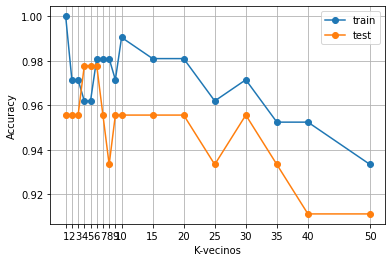

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50])
plt.xlabel('K-vecinos')
plt.ylabel('Accuracy')
plt.grid()

#el optimo es k que tiene el mayor valor de test en este ejemplo k=4 es maximo ese es optimo.
#k=1 sobre entrenado

**Para pensar**: ¿cuál será el mejor hiperparámetro?¿En que región hay sobre-ajuste y en cuál sub-ajuste?

    Hay sobreajuste para knn 1  (acc alto==1 se los aprendio de memoria) y subjauste apartir de k 25.



Te dejamos una celda que puedes correr para observar distintas fronteras de decisión obtenidas para distintos valores del número de vecinos. ¿Notas para qué número de vecinos y en qué región está sobreajustando?

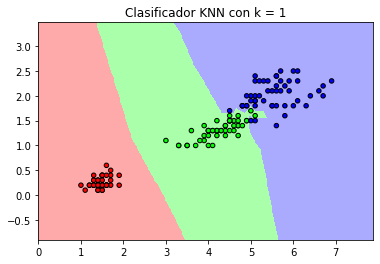

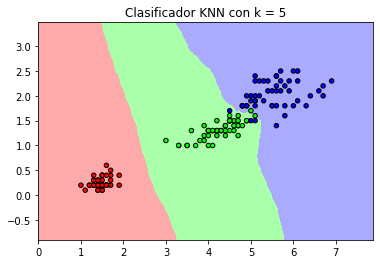

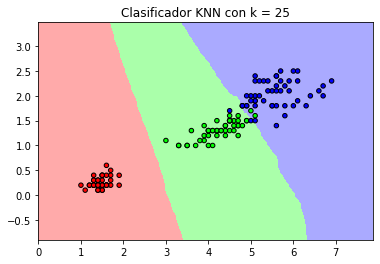

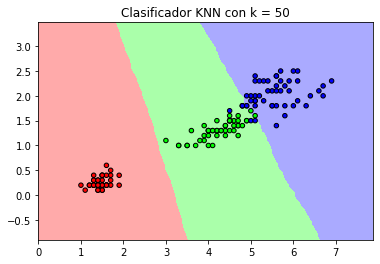

In [ ]:
from matplotlib.colors import ListedColormap

X = data[['petal length (cm)', 'petal width (cm)']].values

y = data.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1,5,25,50]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador KNN con k = %i"% (k))


# k=1, 5 sobreajustado overfitting
#k=50 subajustado
#k=25 ideal

**Curvas de validacíon en Scikit-Learn**

Mencionamos que puedes hacer curvas de validación en Scikit-Learn; puedes encontrar su documentación [aquí](https://scikit-learn.org/stable/modules/learning_curve.html), pero utilizan algo que todavía no vimos, Validación Cruzada. Sin embargo, puedes mirar la documentación para ir familiarizándote.

**Ejercicio:** Repite entrenamiento, evaluación, optimización de hiperparámetro (profundidad) y visualización de fronteras para un`DecisionTreeClassifier`.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=26) #genero dupla entrenamiento y testeo(verdad)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=26) #genero dupla entrenamiento y testeo(verdad)

# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    clf_tree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    
    # Entrenar el modelo
    clf_tree.fit(X_train,y_train)
    

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf_tree.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf_tree.predict(X_test)  
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

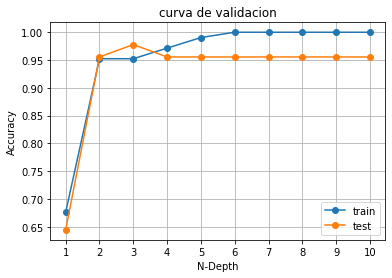

In [ ]:
#Grafico la curva de validacion
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xticks(ticks=max_depths)
plt.xlabel('N-Depth')
plt.ylabel('Accuracy')
plt.title('curva de validacion')
plt.grid()

#parametro optimo depht 2 o 3 (hay un máximo en 3. mayor a 3 está overfitting y en depth 1 es underfiting

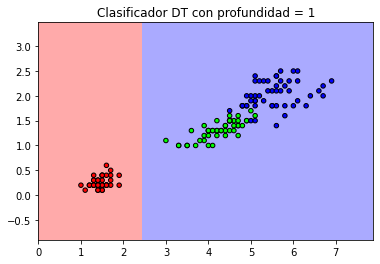

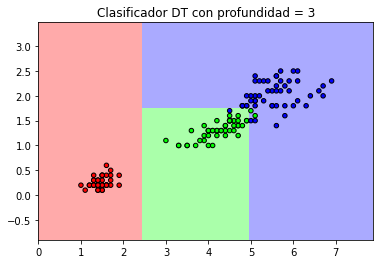

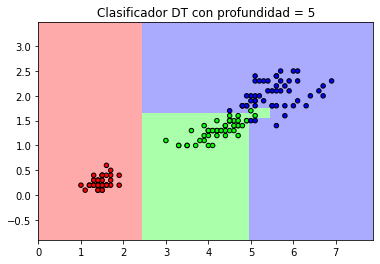

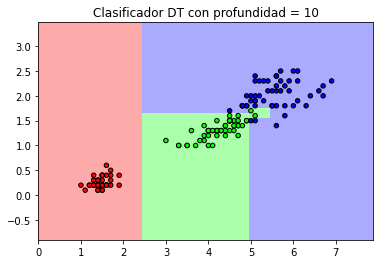

In [ ]:
X = data[['petal length (cm)', 'petal width (cm)']].values
y = data.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for max_depth in [1,3,5,10]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador DT con profundidad = %i"% (max_depth))
    #parametro optimo depht 2 o 3. mayor a 3 está overfitting y en depth 1 es underfiting

### 2. Dataset Titanic

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en:

1. Generar dos casos benchmark para este dataset. ¿Cuáles se te ocurren? Hay una pista en el notebook anterior.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DS_Bitácora_12_Titanic.csv")

X = df.drop("Survived", axis=1) 
#la complejidad acá no es la misma que tener sólo pocos atributos
print(X) 
y = df.Survived

     Pclass  Sex   Age  SibSp  Parch
0         3    0  22.0      1      0
1         1    1  38.0      1      0
2         3    1  26.0      0      0
3         1    1  35.0      1      0
4         3    0  35.0      0      0
..      ...  ...   ...    ...    ...
709       3    1  39.0      0      5
710       2    0  27.0      0      0
711       1    1  19.0      0      0
712       1    0  26.0      0      0
713       3    0  32.0      0      0

[714 rows x 5 columns]


In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


#1er benchmark
print('1er benchmark AD poca profundidad')
# Creamos un objeto arbol
clf = DecisionTreeClassifier(max_depth=2, random_state = 33)
clf.fit(X, y)
# Predecimos sobre nuestro set
y_pred = clf.predict(X)
# Comaparamos con las etiquetas reales
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print()

print('2do benchmark AD mucha profundidad')
#2d0 bench arbol más profundo
clf = DecisionTreeClassifier(max_depth=200, random_state = 33)
clf.fit(X, y)
# Predecimos sobre nuestro set
y_pred = clf.predict(X)
# Comaparamos con las etiquetas reales
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print()
print('3er benchmark knn pocos vecinos')
#3er bench pocos knn
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X, y)
# Predecimos sobre nuestro set
y_pred = clf.predict(X)
# Comaparamos con las etiquetas reales
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print()
print('3er benchmark knn muchos vecinos')
#3er bench mas knn 
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X, y)
# Predecimos sobre nuestro set
y_pred = clf.predict(X)
# Comaparamos con las etiquetas reales
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print()
print('4to benchmark datos random')
#4to benchmark
# Comaparamos con las etiquetas reales
y_pred=np.random.randint(2, size=y.size)

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))



#plt.figure(figsize = (10,8))
#tree.plot_tree(clf, filled = True, feature_names= X.columns)
#plt.show()

#importances = clf.feature_importances_
#columns = X.columns
#sns.barplot(columns, importances)
#plt.title('Importancia de cada Feature')
#plt.show()


1er benchmark AD poca profundidad
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714

[[407  17]
 [124 166]]

2do benchmark AD mucha profundidad
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       424
           1       0.98      0.85      0.91       290

    accuracy                           0.93       714
   macro avg       0.94      0.92      0.93       714
weighted avg       0.94      0.93      0.93       714

[[419   5]
 [ 43 247]]

3er benchmark knn pocos vecinos
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       424
           1       0.90      0.69      0.78       290

    accuracy                     

1. Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente. No te olvides de agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=33) #genero dupla entrenamiento y testeo(verdad)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(499, 5) (499,) (215, 5) (215,)


Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente

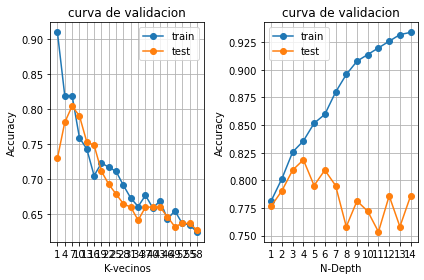

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
tree_accuracy_train = []
tree_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,15)

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    clf_tree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    
    # Entrenar el modelo
    clf_tree.fit(X_train,y_train)
    

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf_tree.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf_tree.predict(X_test)  
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    tree_accuracy_train.append(train_acc)
    tree_accuracy_test.append(test_acc)

# Definimos las listas vacias para los valores de accuracy deseados
Knn_accuracy_train = []
Knn_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = np.arange(1,60,3)

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:

    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)  
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    Knn_accuracy_train.append(train_acc)
    Knn_accuracy_test.append(test_acc)


#Grafico la curva de validacion
plt.subplot(121)
plt.plot(k_vecinos,Knn_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,Knn_accuracy_test,'o-',label='test')
plt.legend()
plt.xticks(ticks=k_vecinos)
plt.xlabel('K-vecinos')
plt.ylabel('Accuracy')
plt.title('curva de validacion')
plt.grid()

plt.subplot(122)
plt.plot(max_depths,tree_accuracy_train,'o-',label='train' )
plt.plot(max_depths,tree_accuracy_test,'o-',label='test')
plt.legend()
plt.xticks(ticks=max_depths)
plt.xlabel('N-Depth')
plt.ylabel('Accuracy')
plt.title('curva de validacion')
plt.grid()
plt.tight_layout()

#underfiting mayor a 60, overfitting k=1
#underfitting dept 1-3, overfitting dept mayor a 12
#optimo de DT es 4
#optimo de knn es entre 7

1. Evaluar precisión, exhaustividad y F-Score para los modelos con los mejores hiperparámetros. Existen varias funciones de Scikit-Learn que puedes usar. Puedes consultar la información [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Es importante que leas **detalladamente** la documentación de la función que elijas.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42) #genero dupla entrenamiento y testeo(verdad)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#optimo de DT es 8 
#optimo de knn es entre 2 y 4
clf = KNeighborsClassifier(n_neighbors= 3)
clf.fit(X_train,y_train)
# Predecir y evaluar sobre el set de entrenamiento
y_train_pred = clf.predict(X_train)
# Predecir y evaluar sobre el set de evaluación
y_test_pred = clf.predict(X_test)  



from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
print(classification_report(y_train, y_train_pred))
print('presicion:',precision_score(y_train, y_train_pred)) #tp / (tp + fp)  true positive, false positive
print('recall:',recall_score(y_train, y_train_pred)) #tp / (tp + fn)  true positive, false negative
print('Fscore:',f1_score(y_train, y_train_pred)) #2*pres*recall/pres+recall


#0 y 1 son las categorias, survied or not
#para el trabajo final
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

(499, 5) (499,) (215, 5) (215,)
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       298
           1       0.87      0.78      0.82       201

    accuracy                           0.86       499
   macro avg       0.86      0.85      0.85       499
weighted avg       0.86      0.86      0.86       499

presicion: 0.8666666666666667
recall: 0.7761194029850746
Fscore: 0.8188976377952756
